 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [115]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [116]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [117]:
n = whale_df.shape[0]
m = whale_df.shape[1]
for i in range(m):
    mean_column = np.mean(whale_df.iloc[:,i])
    for j in range(n):
        if whale_df.iloc[j,i] == 0.0:
            whale_df.iloc[j,i] = mean_column
whale_df.iloc[244:248]


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2016-02-11,0.000179,-0.000203,-0.000081,0.000501
2016-02-12,0.000179,-0.000203,-0.000081,0.000501
2016-02-15,0.000179,-0.000203,-0.000081,0.000501
2016-02-16,0.021759,0.013463,0.008260,0.048366


In [118]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [119]:
# Drop nulls
# YOUR CODE HERE
whale_clean= whale_df.dropna()

In [120]:
whale_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [121]:
len(whale_clean.index)

1059

In [122]:
whale_clean.index.nunique()

1059

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [123]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [124]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum(axis = 0)

Algo 1    0
Algo 2    6
dtype: int64

In [125]:
# Drop nulls
# YOUR CODE HERE
mean_algo_2= np.mean(algo_df['Algo 2'])
algo_df['Algo 2'] = algo_df['Algo 2'].fillna(mean_algo_2)
algo_df.isnull().sum(axis = 0)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000341
2014-05-29,0.003978,0.000341
2014-05-30,0.004464,0.000341
2014-06-02,0.005692,0.000341
2014-06-03,0.005292,0.000341
2014-06-04,-0.001838,0.000341
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [126]:
len(algo_df.index)

1241

In [127]:
algo_df.index.nunique()

1241

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [128]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [129]:
#sort sp500_df to ascending index
sp500_df = sp500_df.sort_index(axis=0, ascending=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [130]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [131]:
# Fix Data Types
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [132]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [133]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500= daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [134]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500.rename(columns={'Close':'S&P 500'}, inplace=True)
daily_returns_sp500.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [135]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combine_all_df= pd.concat([whale_clean, algo_df, daily_returns_sp500], axis="columns", join="inner")
combine_all_df.sort_index(inplace=True)
# Set column names

combine_all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

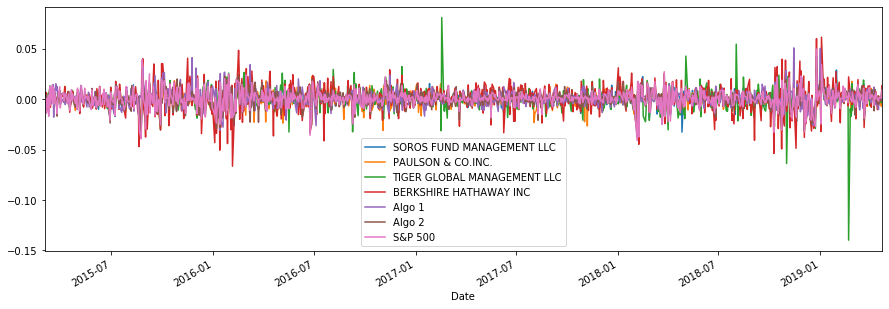

In [136]:
# Plot daily returns
# YOUR CODE HERE
combine_all_df.plot(figsize=(15,5));

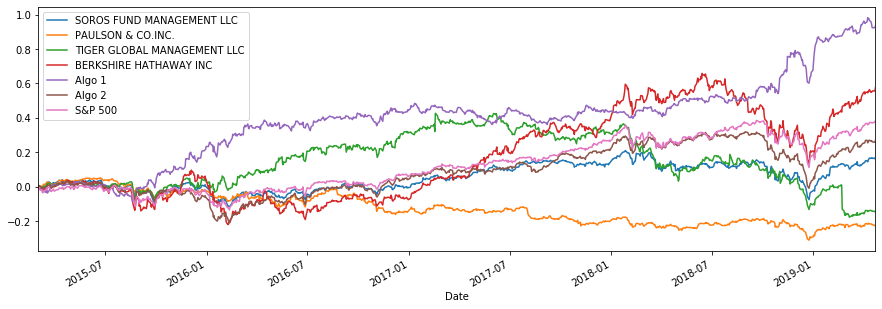

In [137]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combine_all_df).cumprod() - 1
cumulative_returns.plot(figsize=(15,5));


---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [138]:
# Returns by Year
# YOUR CODE HERE
combined_rtn= (1 + combine_all_df).groupby(combine_all_df.index.year).prod()- 1
combined_rtn.index.names = ["Year"]
combined_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Year,,,,,,,
2015,-0.001771,-0.025072,0.027064,0.038072,0.233385,-0.065759,-0.034689
2016,-0.005393,-0.120745,0.277267,-0.110540,0.169350,0.113744,0.095350
2017,0.145504,-0.071068,-0.001062,0.496799,-0.003228,0.162514,0.194200
2018,-0.142744,-0.112037,-0.318003,-0.126343,0.165843,-0.141432,-0.062373
2019,0.200676,0.096158,-0.038648,0.305363,0.154337,0.222163,0.170265


In [139]:
# Top Portfolio returns for 2017
combined2017_df = combined_rtn.loc[2017]
combined2017_df.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.496799
S&P 500                        0.194200
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.145504
TIGER GLOBAL MANAGEMENT LLC   -0.001062
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.071068
Name: 2017, dtype: float64

In [140]:
# Returns by Month
# YOUR CODE HERE
# End of Month Returns
last_of_month_ret = combine_all_df.groupby(
    [combine_all_df.index.year, combine_all_df.index.month]
).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2015 3                            NaN                 NaN   
     4                       0.685080            0.416531   
     5                      -0.832895           -1.013720   
     6                      -4.961389           25.392127   
     7                      -1.475545           -1.670321   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Year Month                                                                  
2015 3                              NaN                     NaN       NaN   
     4                         1.606156               -5.286325 -4.906565   
     5                        -0.519077               -0.309686 -0.811145   
     6                        -1.818631               -3.150946 -2.471604   
     7                        -1.450589               -1.016272 -2.195724   

              Algo 2   S&P 500  
Year Month                      
2015 3           NaN       NaN  
     4      1.895436  0.151566  
     5     -0.439997 -0.376199  
     6     -2.389876 -1.420737  
     7     -0.517524 -1.854510

In [141]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE
december_2018 = monthly_returns.loc[2018, 12]
december_2018.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         4.260028
Algo 2                         1.302912
S&P 500                        0.037495
Algo 1                        -1.677103
PAULSON & CO.INC.             -2.287166
TIGER GLOBAL MANAGEMENT LLC   -2.708194
SOROS FUND MANAGEMENT LLC     -4.118575
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

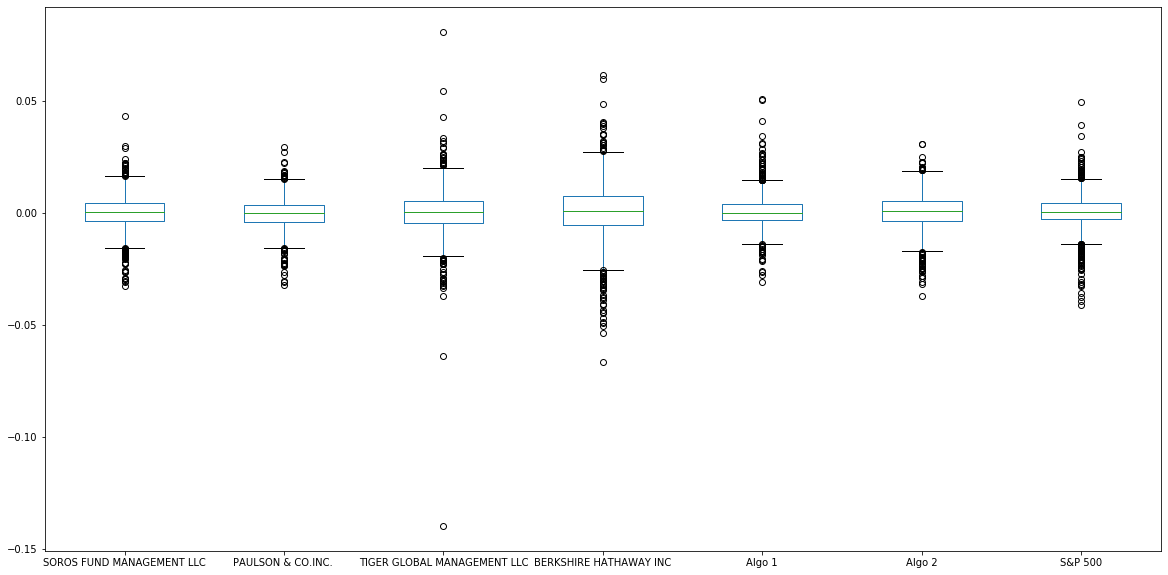

In [142]:
# Box plot to visually show risk
# YOUR CODE HERE
combine_all_df.plot.box(figsize=(20,10))

In [143]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
portfolio_daily_std= combine_all_df.std()
portfolio_daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012918
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [144]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500_daily_std= portfolio_daily_std["S&P 500"]
print(portfolio_daily_std > sp500_daily_std)

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [145]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = portfolio_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125334
PAULSON & CO.INC.              0.111486
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205072
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

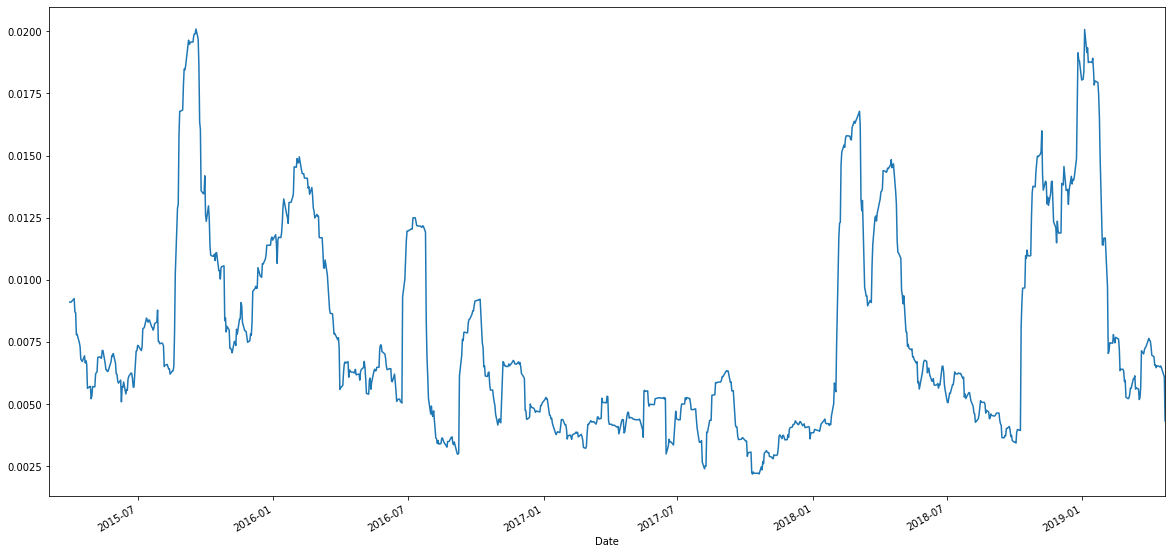

In [146]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
# YOUR CODE HERE
combine_all_df["S&P 500"].rolling(window=21).std().plot(figsize=(20,10))

In [147]:
# Correlation
# YOUR CODE HERE
correlation= combine_all_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699948,0.561253,0.754357,0.321162,0.826884,0.837828
PAULSON & CO.INC.,0.699948,1.000000,0.434478,0.545676,0.268910,0.678154,0.669794
TIGER GLOBAL MANAGEMENT LLC,0.561253,0.434478,1.000000,0.424441,0.164404,0.507413,0.623960
BERKSHIRE HATHAWAY INC,0.754357,0.545676,0.424441,1.000000,0.291951,0.688107,0.751317
Algo 1,0.321162,0.268910,0.164404,0.291951,1.000000,0.288243,0.279494
Algo 2,0.826884,0.678154,0.507413,0.688107,0.288243,1.000000,0.858764
S&P 500,0.837828,0.669794,0.623960,0.751317,0.279494,0.858764,1.000000


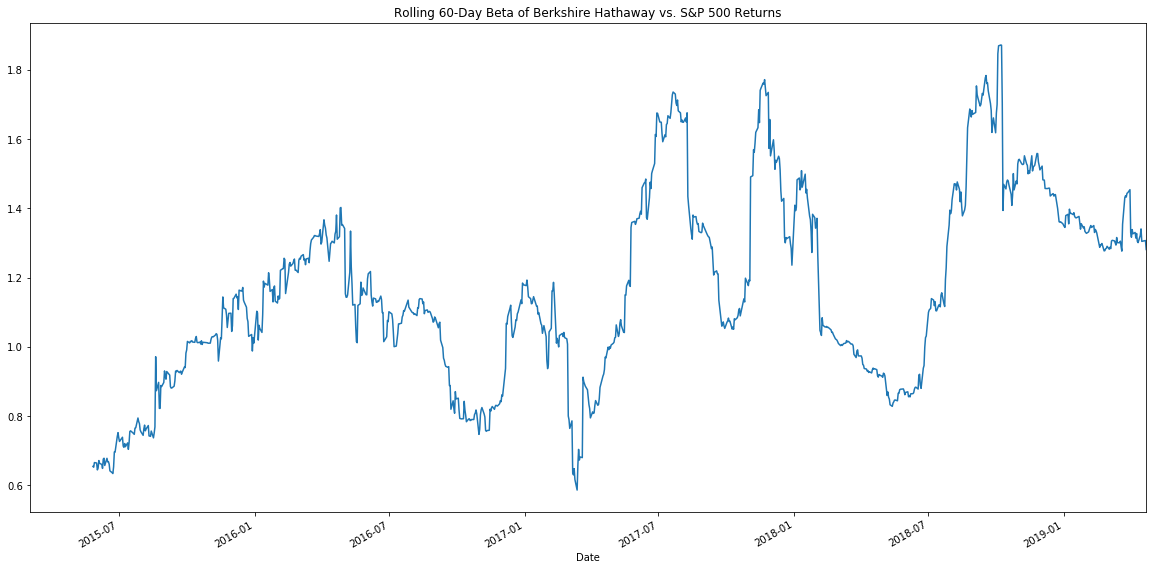

In [148]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance_berk = combine_all_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combine_all_df["S&P 500"])
variance_sp500 = combine_all_df['S&P 500'].rolling(window=60).var()
berk_beta = covariance_berk / variance_sp500
berk_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Berkshire Hathaway vs. S&P 500 Returns')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

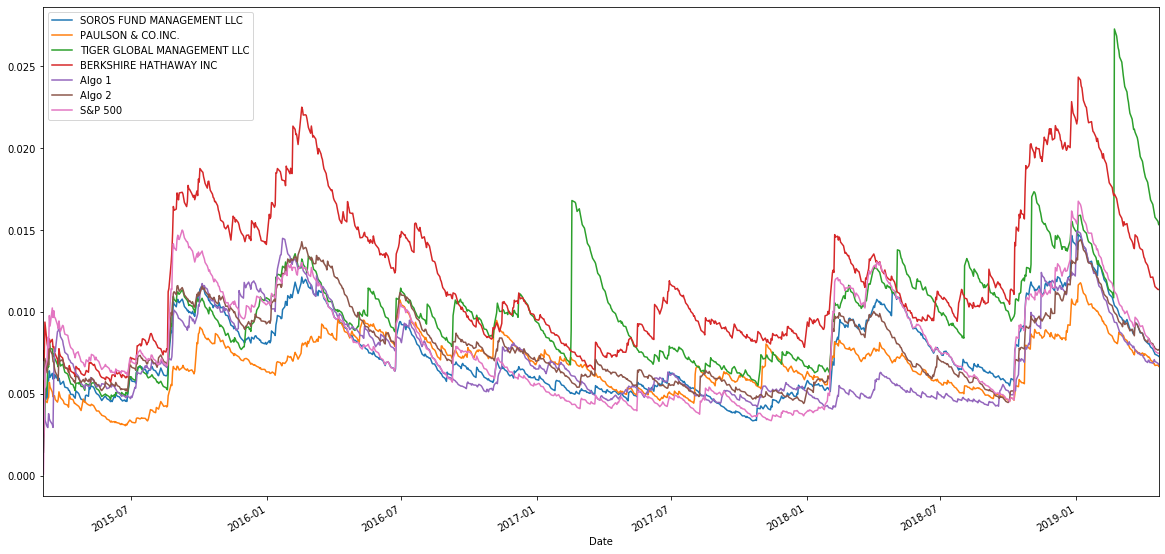

In [149]:
# (OPTIONAL) YOUR CODE HERE
combine_all_df.ewm(halflife=21).std().plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [150]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio_annualized = (combine_all_df.mean()/ combine_all_df.std()) *np.sqrt(252)
sharpe_ratio_annualized

SOROS FUND MANAGEMENT LLC      0.366405
PAULSON & CO.INC.             -0.496341
TIGER GLOBAL MANAGEMENT LLC   -0.124327
BERKSHIRE HATHAWAY INC         0.638935
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

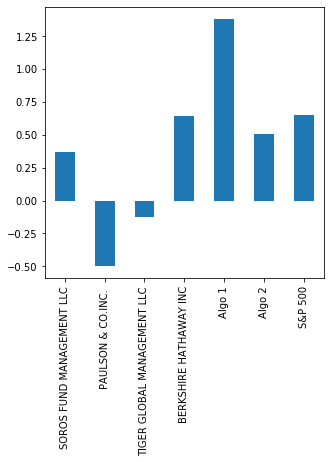

In [151]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_annualized.plot.bar(figsize=(5,5))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [152]:
# Read the second stock
# YOUR CODE HERE
hd_history_csv= Path("hd_historical.csv")
hd_df= pd.read_csv(hd_history_csv)
hd_df.rename(columns={'close':'HD', 'date':'Date'}, inplace=True)
hd_df.set_index(pd.to_datetime(hd_df['Date'], infer_datetime_format=True), inplace=True)
hd_df.drop(columns=['Date', 'volume', 'open', 'high', 'low'], inplace=True)
hd_df = hd_df.sort_index(axis=0, ascending=True)

hd_df.head()


,HD
Date,
2018-02-22,185.47
2018-02-23,188.35
2018-02-26,188.46
2018-02-27,184.98
2018-02-28,182.27


In [153]:
# Read the second stock
# YOUR CODE HERE
oxy_history_csv= Path("oxy_historical.csv")
oxy_df= pd.read_csv(oxy_history_csv)
oxy_df.rename(columns={'close':'OXY', 'date':'Date'}, inplace=True)
oxy_df.set_index(pd.to_datetime(oxy_df['Date'], infer_datetime_format=True), inplace=True)
oxy_df.drop(columns=['Date'], inplace=True)
oxy_df = oxy_df.sort_index(axis=0, ascending=True)

oxy_df.head()

,OXY
Date,
2018-02-22,67.92
2018-02-23,68.32
2018-02-26,67.27
2018-02-27,66.75
2018-02-28,65.60


In [154]:
# Read the third stock
# YOUR CODE HERE
costco_history_csv= Path("cost_historical_2.csv")
costco_df= pd.read_csv(costco_history_csv)
costco_df.rename(columns={'close':'COST(CostCo)', 'date':'Date'}, inplace=True)
costco_df.set_index(pd.to_datetime(costco_df['Date'], infer_datetime_format=True), inplace=True)
costco_df.drop(columns=['Date'], inplace=True)
costco_df = costco_df.sort_index(axis=0, ascending=True)

costco_df.tail()

,COST(CostCo)
Date,
2019-08-16,274.10
2019-08-19,275.61
2019-08-20,272.97
2019-08-21,275.68
2019-08-22,279.92


In [155]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combine_all_df2= pd.concat([hd_df, oxy_df, costco_df], axis="columns", join="inner")
combine_all_df2.sort_index(inplace=True)
combine_all_df2.head()

,HD,OXY,COST(CostCo)
Date,,,
2018-02-22,185.47,67.92,186.59
2018-02-23,188.35,68.32,189.81
2018-02-26,188.46,67.27,192.81
2018-02-27,184.98,66.75,190.10
2018-02-28,182.27,65.60,190.90


In [156]:
# Reset the index
# YOUR CODE HERE

#already done

In [157]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

#already done

In [158]:
daily_returns_df2 = combine_all_df2.pct_change()
daily_returns_df2.head()

,HD,OXY,COST(CostCo)
Date,,,
2018-02-22,NaN,NaN,NaN
2018-02-23,0.015528,0.005889,0.017257
2018-02-26,0.000584,-0.015369,0.015805
2018-02-27,-0.018465,-0.007730,-0.014055
2018-02-28,-0.014650,-0.017228,0.004208


In [159]:
# Drop Nulls
# YOUR CODE HERE
daily_returns_df2= daily_returns_df2.dropna()
daily_returns_df2.head()

,HD,OXY,COST(CostCo)
Date,,,
2018-02-23,0.015528,0.005889,0.017257
2018-02-26,0.000584,-0.015369,0.015805
2018-02-27,-0.018465,-0.007730,-0.014055
2018-02-28,-0.014650,-0.017228,0.004208
2018-03-01,-0.014429,0.000457,-0.009796


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns_df2 = daily_returns_df2.dot(weights)
#portfolio_returns_df2.reset_index()
columns=["BCT Portfolio"]
portfolio_returns_df2=pd.DataFrame(portfolio_returns_df2)
portfolio_returns_df2.columns= columns
portfolio_returns_df2.head()

,BCT Portfolio
Date,
2018-02-23,0.012891
2018-02-26,0.000340
2018-02-27,-0.013417
2018-02-28,-0.009223
2018-03-01,-0.007923


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
# YOUR CODE HERE
combine_all_portfolios= pd.concat([portfolio_returns_df2, combine_all_df], axis="columns", join="inner")
combine_all_portfolios.sort_index(inplace=True)
combine_all_portfolios.head()

,BCT Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-02-23,0.012891,0.013610,0.005862,0.018408,0.016526,0.000155,0.010247,0.016028
2018-02-26,0.000340,0.003984,0.006145,0.009546,-0.001412,-0.001839,0.005430,0.011757
2018-02-27,-0.013417,-0.018335,-0.007856,-0.021110,-0.012554,-0.002081,-0.011960,-0.012707
2018-02-28,-0.009223,-0.010668,-0.011224,-0.011477,-0.002810,0.011080,-0.012156,-0.011096
2018-03-01,-0.007923,-0.008892,-0.002514,-0.004376,-0.010229,0.005933,-0.006601,-0.013324


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

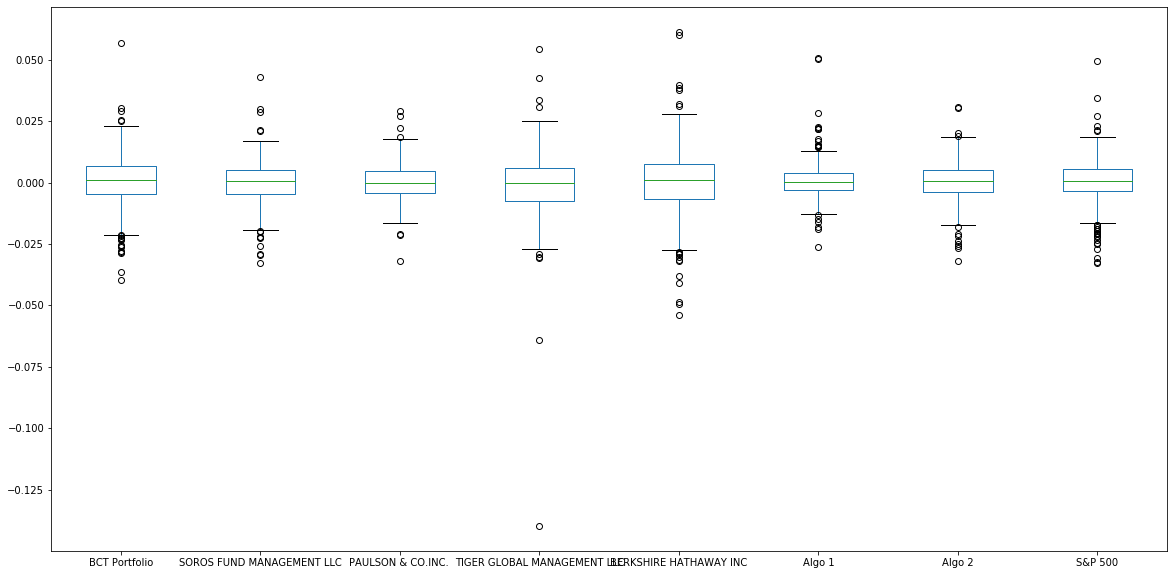

In [162]:
# Box plot of all portfolios
# YOUR CODE HERE
combine_all_portfolios.plot.box(figsize=(20,10))

In [163]:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
all_portfolio_daily_std= combine_all_portfolios.std()
all_portfolio_daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.014751
TIGER GLOBAL MANAGEMENT LLC    0.014310
BCT Portfolio                  0.010954
S&P 500                        0.009873
SOROS FUND MANAGEMENT LLC      0.009515
Algo 2                         0.008653
Algo 1                         0.007949
PAULSON & CO.INC.              0.007318
dtype: float64

In [164]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp500_daily_std= all_portfolio_daily_std["S&P 500"]
print(all_portfolio_daily_std > sp500_daily_std)

BCT Portfolio                   True
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [165]:
all_annualized_std = all_portfolio_daily_std * np.sqrt(252)
all_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.234167
TIGER GLOBAL MANAGEMENT LLC    0.227163
BCT Portfolio                  0.173886
S&P 500                        0.156724
SOROS FUND MANAGEMENT LLC      0.151040
Algo 2                         0.137358
Algo 1                         0.126182
PAULSON & CO.INC.              0.116165
dtype: float64

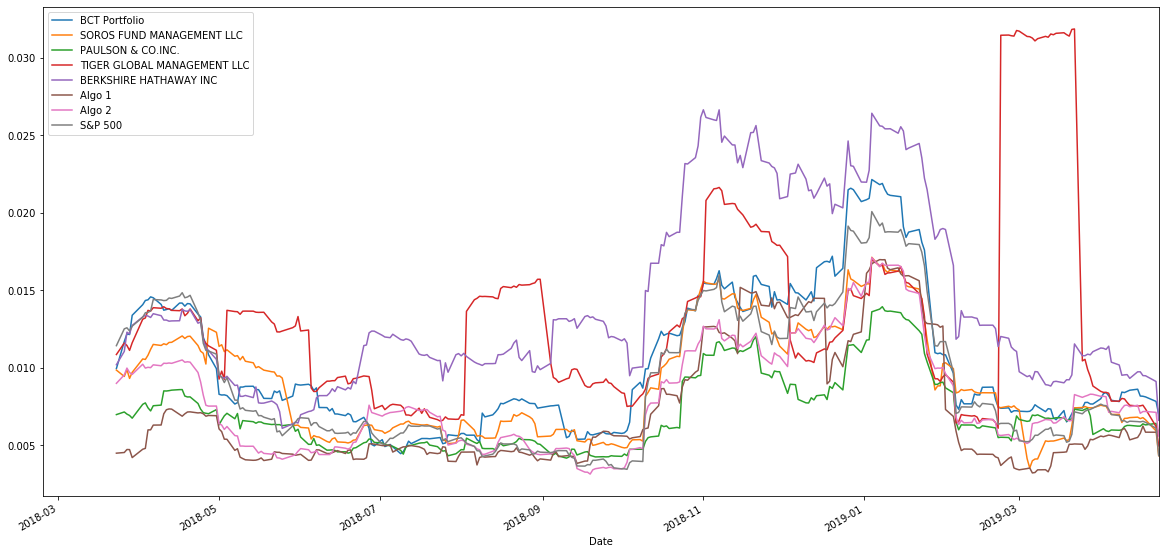

In [166]:
# Rolling
# YOUR CODE HERE
combine_all_portfolios.rolling(window=21).std().plot(figsize=(20,10))

In [167]:
# portfolio correlation
# YOUR CODE HERE
all_correlation= combine_all_portfolios.corr()
all_correlation

,BCT Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
BCT Portfolio,1.000000,0.698662,0.660378,0.464809,0.640299,0.238314,0.739966,0.811045
SOROS FUND MANAGEMENT LLC,0.698662,1.000000,0.772675,0.511265,0.793700,0.325762,0.844019,0.857160
PAULSON & CO.INC.,0.660378,0.772675,1.000000,0.523488,0.647529,0.339071,0.789403,0.777149
TIGER GLOBAL MANAGEMENT LLC,0.464809,0.511265,0.523488,1.000000,0.367058,0.132258,0.464364,0.540675
BERKSHIRE HATHAWAY INC,0.640299,0.793700,0.647529,0.367058,1.000000,0.320060,0.788198,0.840160
Algo 1,0.238314,0.325762,0.339071,0.132258,0.320060,1.000000,0.347182,0.277282
Algo 2,0.739966,0.844019,0.789403,0.464364,0.788198,0.347182,1.000000,0.882360
S&P 500,0.811045,0.857160,0.777149,0.540675,0.840160,0.277282,0.882360,1.000000


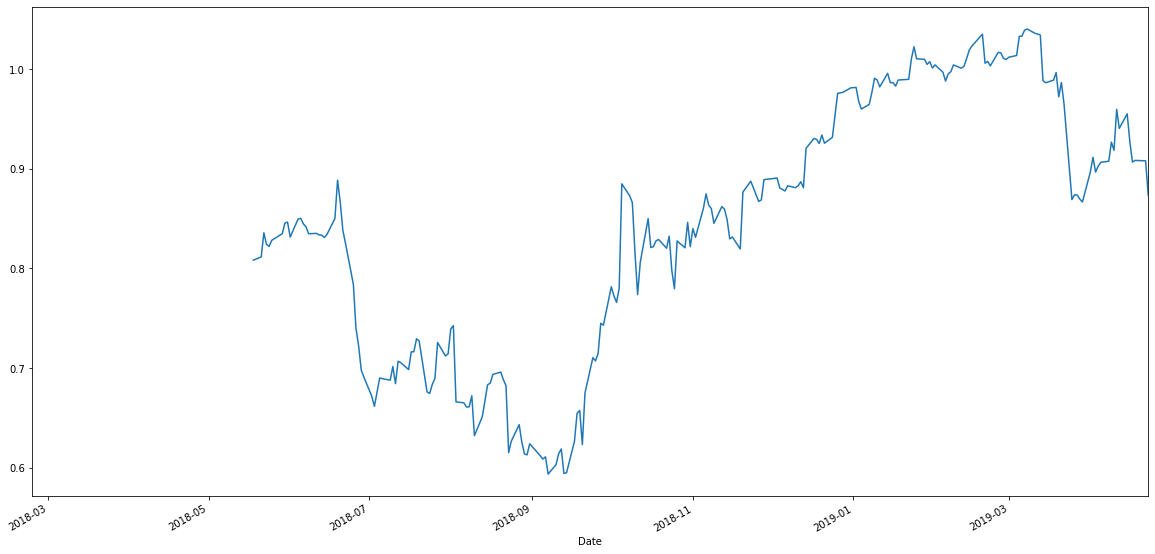

In [168]:
#portfolio Beta
covariance_all = combine_all_portfolios["BCT Portfolio"].rolling(window=60).cov(combine_all_portfolios["S&P 500"])
variance_sp500_all = combine_all_portfolios['S&P 500'].rolling(window=60).var()
all_portfolio_beta = covariance_all / variance_sp500_all
all_portfolio_beta.plot(figsize=(20,10))

In [169]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio_annualized_all = (combine_all_portfolios.mean()/ combine_all_portfolios.std()) *np.sqrt(252)
sharpe_ratio_annualized_all

BCT Portfolio                  0.633172
SOROS FUND MANAGEMENT LLC      0.041305
PAULSON & CO.INC.              0.042761
TIGER GLOBAL MANAGEMENT LLC   -1.166373
BERKSHIRE HATHAWAY INC         0.287609
Algo 1                         2.068074
Algo 2                         0.185544
S&P 500                        0.527209
dtype: float64

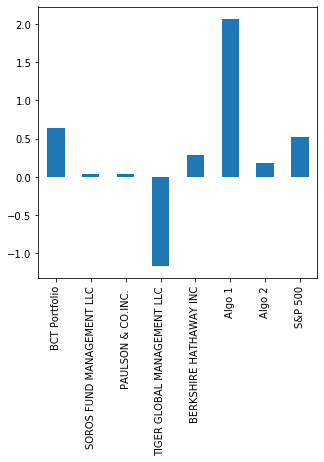

In [170]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_annualized_all.plot.bar(figsize=(5,5))

## Include correlation analysis to determine which stocks (if any) are correlated

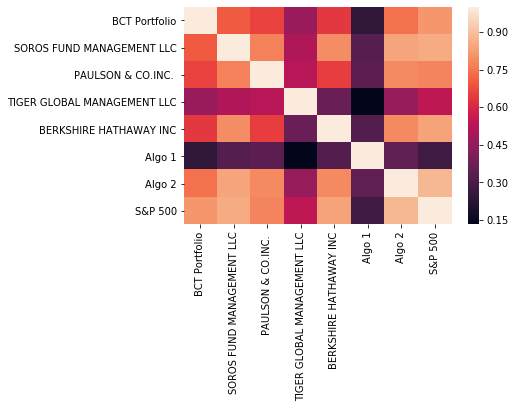

In [172]:
# YOUR CODE HERE
#all_correlation= combine_all_portfolios.corr()
#all_correlation.plot()
import seaborn as sns
corr_all = combine_all_portfolios.corr()
sns.heatmap(corr_all, 
            xticklabels=corr_all.columns.values,
            yticklabels=corr_all.columns.values)